# Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot

# Load The Dataset

In [5]:
data = pd.read_excel(r'downloads\Project_sales.xlsx', parse_dates = ['Created'], index_col = 0)
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,2018-04-28 09:43:00,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,2018-04-28 09:20:00,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,2018-04-28 08:04:00,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Create a new dataframe from a existing dataframe

In [3]:
data = pd.DataFrame(data,columns=['Created','Product_ID','Source','Mobile','EMAIL','Sales_Agent','Location','Delivery_Mode','Status'])
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,2018-04-28 09:45:00,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,2018-04-28 09:43:00,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,2018-04-28 09:20:00,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,2018-04-28 08:04:00,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Exploratory Data Analysis

In [4]:
data.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [7]:
data.describe(include = 'O')

,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7405,5612,7422,7399,7364,7422,7422
unique,25,486,883,12,17,5,11
top,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,2547,222,1701,1500,2500,2975,1536


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
Created          7422 non-null datetime64[ns]
Product_ID       7364 non-null float64
Source           7405 non-null object
Mobile           5612 non-null object
EMAIL            7422 non-null object
Sales_Agent      7399 non-null object
Location         7364 non-null object
Delivery_Mode    7422 non-null object
Status           7422 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 522.0+ KB


In [6]:
data.shape

(7422, 9)

In [7]:
data.isna().sum().to_frame().T

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,58,17,1810,0,23,58,0,0


In [8]:
data.isna().sum().to_frame().any()

0    True
dtype: bool

In [9]:
data.dtypes

Created          datetime64[ns]
Product_ID              float64
Source                   object
Mobile                   object
EMAIL                    object
Sales_Agent              object
Location                 object
Delivery_Mode            object
Status                   object
dtype: object

In [10]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [11]:
data.groupby(by=['Product_ID'])['Sales_Agent'].count()

Product_ID
0.0        2
1.0      104
2.0       38
3.0        7
4.0        1
5.0      485
6.0        7
7.0        1
8.0        6
9.0      992
10.0     168
11.0      12
12.0      36
13.0       4
14.0      27
15.0    1507
16.0       3
17.0       6
18.0    1709
19.0    1188
20.0     102
21.0      65
22.0       8
23.0       2
24.0       2
25.0      90
26.0      31
27.0     737
28.0       1
Name: Sales_Agent, dtype: int64

In [12]:
new = data.groupby(by=['Location'])['Delivery_Mode'].count()
new

Location
AUSTRALIA            25
Bangalore          2084
Chennai             909
Delhi               471
EUROPE                3
Howrah                1
Hyderabad           528
Kolkata              55
Malaysia              4
Mumbai              402
Other Locations    2500
Pune                142
Singapore            17
Trivandrum           58
UAE                  79
UK                   41
USA                  45
Name: Delivery_Mode, dtype: int64

# Location vs Delivery_Mode

Text(0, 0.5, 'Delivery_Mode')

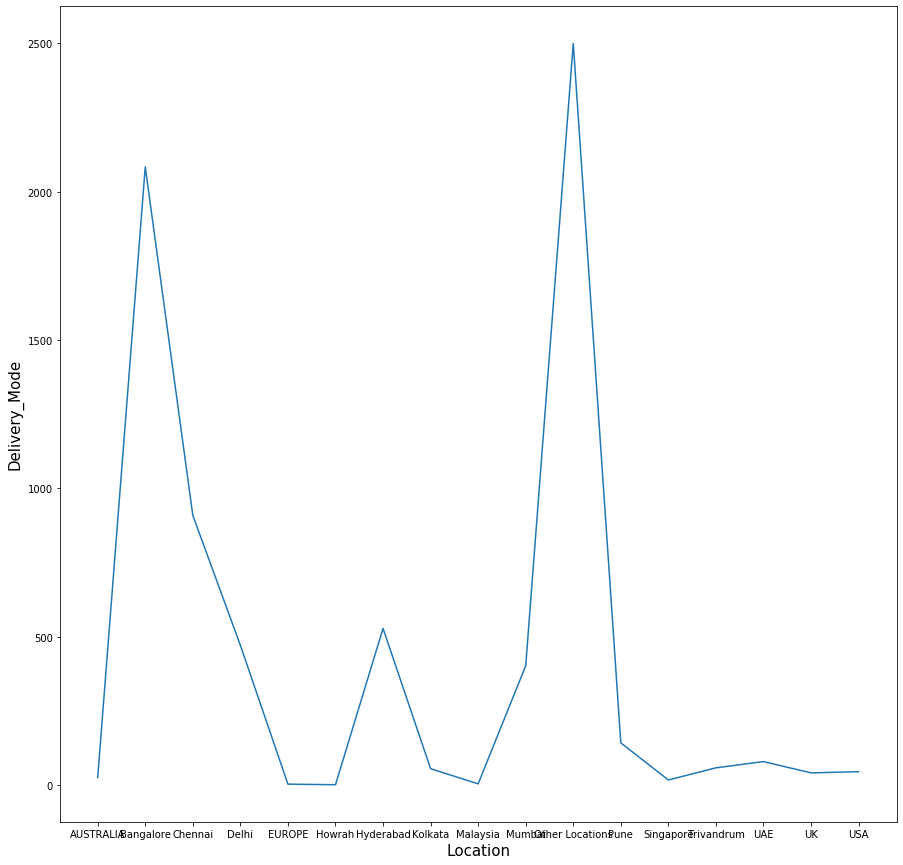

In [13]:
plt.figure(figsize=(15,15))
plt.plot(new)
plt.xlabel('Location',fontsize=15)
plt.ylabel('Delivery_Mode',fontsize=15)

In [14]:
data.groupby(by=['Sales_Agent'])['Product_ID'].mean()

Sales_Agent
Sales-Agent-1           NaN
Sales-Agent-10    14.200000
Sales-Agent-11    15.526464
Sales-Agent-12    16.460967
Sales-Agent-2     16.899743
Sales-Agent-3     15.994878
Sales-Agent-4     15.797730
Sales-Agent-5     16.970489
Sales-Agent-6     11.438596
Sales-Agent-7     14.970109
Sales-Agent-8     15.294118
Sales-Agent-9     16.350797
Name: Product_ID, dtype: float64

# Sales Agent vs Product ID

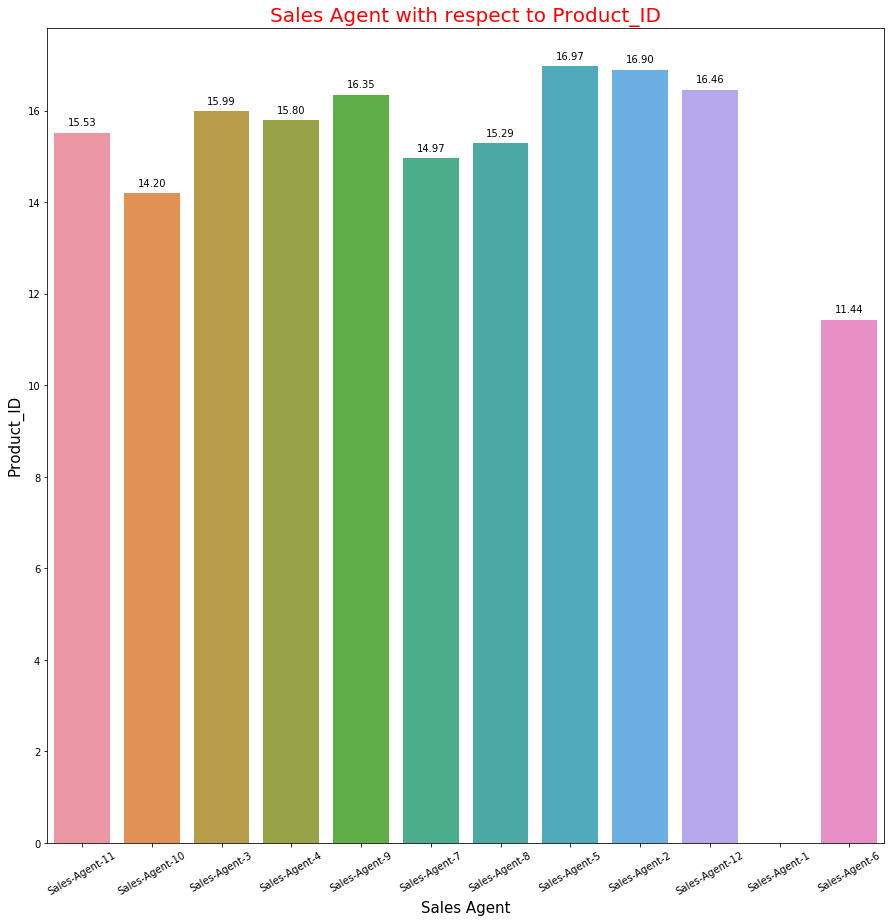

In [15]:
plt.figure(figsize=(15,15))
splot=sns.barplot(data['Sales_Agent'],data['Product_ID'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Sales Agent",fontsize=15,color='black')
plt.ylabel("Product_ID",fontsize=15,color='black')
plt.title("Sales Agent with respect to Product_ID",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



Sales Agent 5 has maximum Product_ID

In [16]:
delivery=data.groupby(by=['Product_ID'])['Delivery_Mode'].count()
delivery

Product_ID
0.0        2
1.0      105
2.0       38
3.0        7
4.0        1
5.0      487
6.0        7
7.0        1
8.0        6
9.0      992
10.0     168
11.0      12
12.0      36
13.0       5
14.0      27
15.0    1518
16.0       3
17.0       7
18.0    1711
19.0    1189
20.0     102
21.0      66
22.0       8
23.0       2
24.0       3
25.0      90
26.0      31
27.0     739
28.0       1
Name: Delivery_Mode, dtype: int64

# Product_ID vs Delivery_mode

Text(0, 0.5, 'Delivery_Mode')

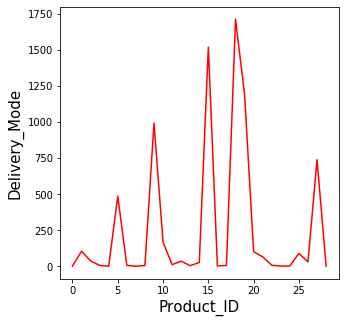

In [17]:
plt.figure(figsize=(5,5))
plt.plot(delivery,color='red')
plt.xlabel('Product_ID',fontsize=15)
plt.ylabel('Delivery_Mode',fontsize=15)

 Product_ID 18 has maximum delivery mode

In [18]:
source = data.groupby(by=['Product_ID'])['Source'].count()
source

Product_ID
0.0        2
1.0      105
2.0       38
3.0        7
4.0        1
5.0      486
6.0        7
7.0        1
8.0        6
9.0      990
10.0     168
11.0      12
12.0      36
13.0       5
14.0      27
15.0    1516
16.0       3
17.0       7
18.0    1709
19.0    1189
20.0     102
21.0      66
22.0       8
23.0       2
24.0       3
25.0      90
26.0      31
27.0     739
28.0       1
Name: Source, dtype: int64

# Product ID vs Source

Text(0, 0.5, 'Source')

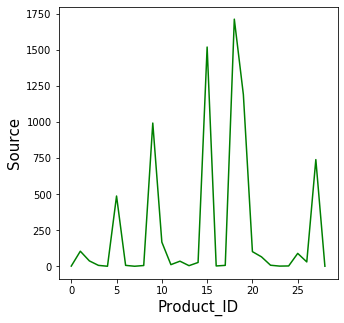

In [19]:
plt.figure(figsize=(5,5))
plt.plot(delivery,color='green')
plt.xlabel('Product_ID',fontsize=15)
plt.ylabel('Source',fontsize=15)

Product ID 18 has maximum Sources

In [20]:
location=data.groupby(by=['Location'])['Product_ID'].count()
location

Location
AUSTRALIA            25
Bangalore          2084
Chennai             909
Delhi               471
EUROPE                3
Howrah                1
Hyderabad           528
Kolkata              55
Malaysia              4
Mumbai              401
Other Locations    2496
Pune                142
Singapore            17
Trivandrum           58
UAE                  78
UK                   41
USA                  45
Name: Product_ID, dtype: int64

In [21]:
location_status=data.groupby(by=['Location'])['Status'].count()
location_status

Location
AUSTRALIA            25
Bangalore          2084
Chennai             909
Delhi               471
EUROPE                3
Howrah                1
Hyderabad           528
Kolkata              55
Malaysia              4
Mumbai              402
Other Locations    2500
Pune                142
Singapore            17
Trivandrum           58
UAE                  79
UK                   41
USA                  45
Name: Status, dtype: int64

# Location vs Status

Text(0.5, 1.0, 'Count of status based on location')

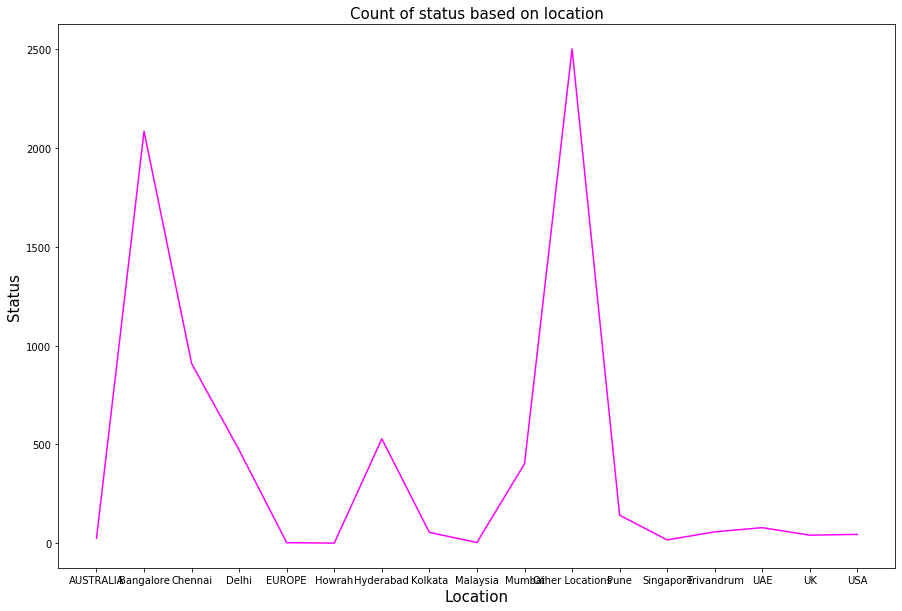

In [22]:
plt.figure(figsize=(15,10))
plt.plot(location_status,color='magenta')
plt.xlabel('Location',fontsize=15)
plt.ylabel('Status',fontsize=15)
plt.title("Count of status based on location",color='black',fontsize=15)

# Total Count of different Product_IDs

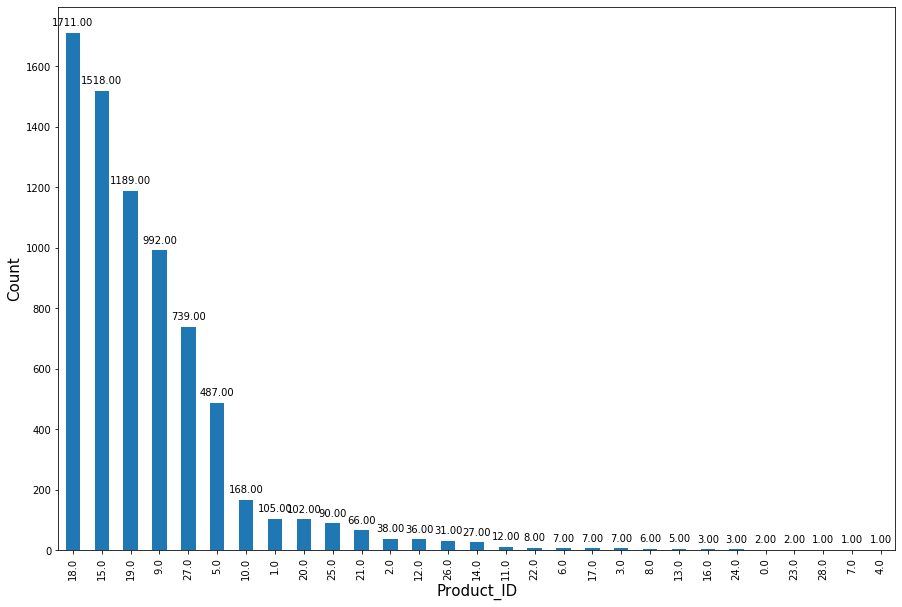

In [23]:
plt.figure(figsize=(15,10))
Product_ID=data.Product_ID.value_counts()
plt.xlabel('Product_ID',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Product_ID.plot(kind='bar')
for p in splot.patches:
     splot.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),  textcoords = 'offset points')


product_ID 18 is sold maximum entries and Product_ID 28,7 and 4 has only one entry each

# Total Count of different Sources

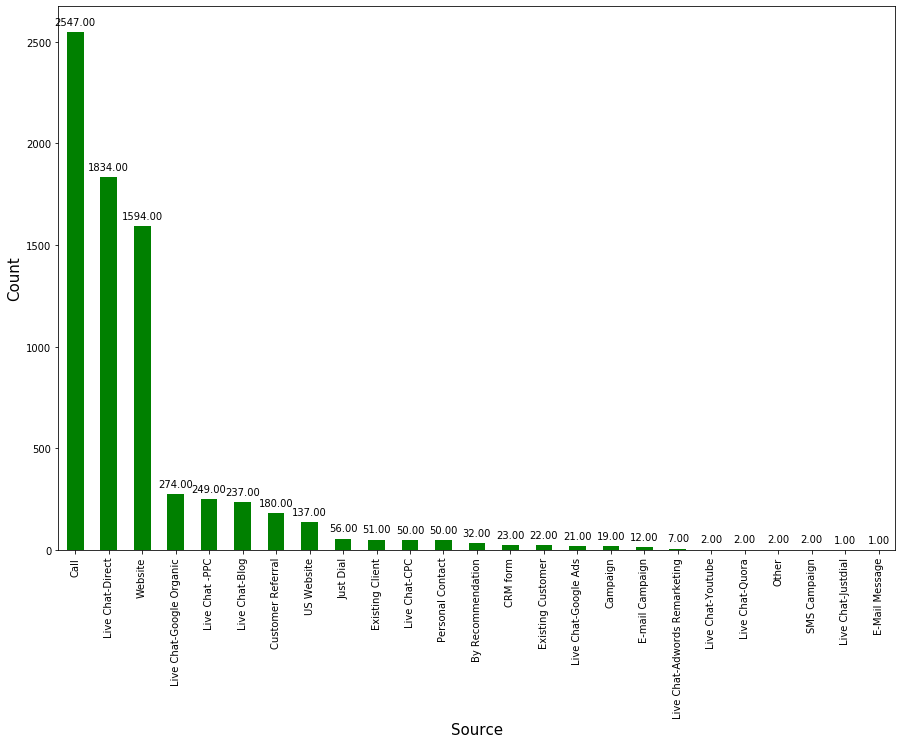

In [24]:
plt.figure(figsize=(15,10))
Source=data.Source.value_counts()
plt.xlabel('Source',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Source.plot(kind='bar',color='green')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),  textcoords = 'offset points')
    

# Total Count of different Sales_Agent

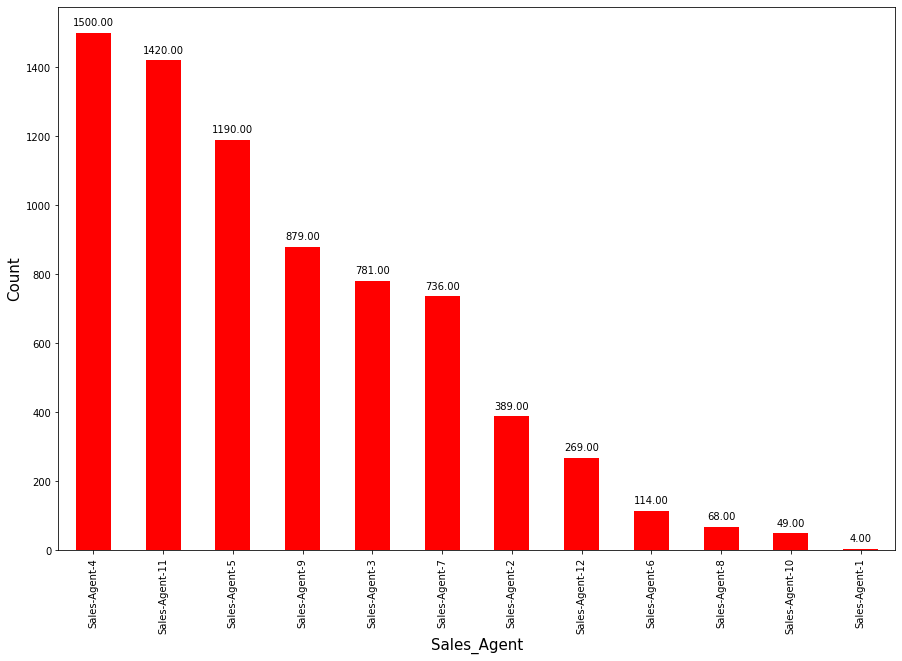

In [25]:
plt.figure(figsize=(15,10))
Sales_Agent=data.Sales_Agent.value_counts()
plt.xlabel('Sales_Agent',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Sales_Agent.plot(kind='bar',color='red')
for p in splot.patches:
     splot.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),  textcoords = 'offset points')
    

Sales_Agent-4 has maximum entries and Sales_Agent-1 has less entries

# Total Count of Different locations

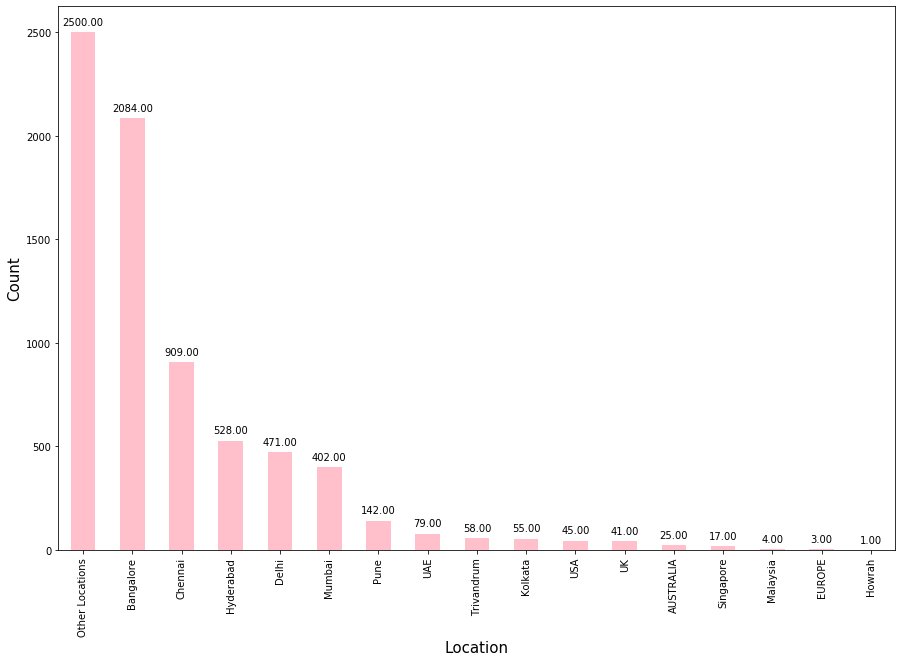

In [26]:
plt.figure(figsize=(15,10))
Location=data.Location.value_counts()
plt.xlabel('Location',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Location.plot(kind='bar',color='pink')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),  textcoords = 'offset points')
    

Banglore has most sales generation in India and Howrah has least sales generation in India.Other locations show maximum
sales generation.

# Total Count of different Delivery Modes

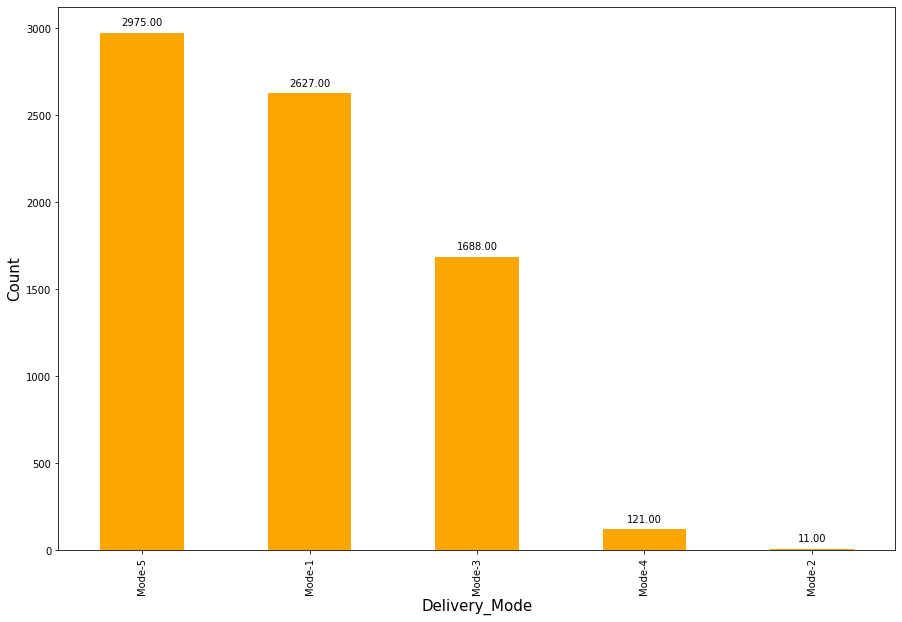

In [27]:
plt.figure(figsize=(15,10))
Delivery_Mode=data.Delivery_Mode.value_counts()
plt.xlabel('Delivery_Mode',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Delivery_Mode.plot(kind='bar',color='orange')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),  textcoords = 'offset points')

Mode-5 is easy mode of delivery and Mode-2 is very difficult mode of delivery

# Total Count of different Status

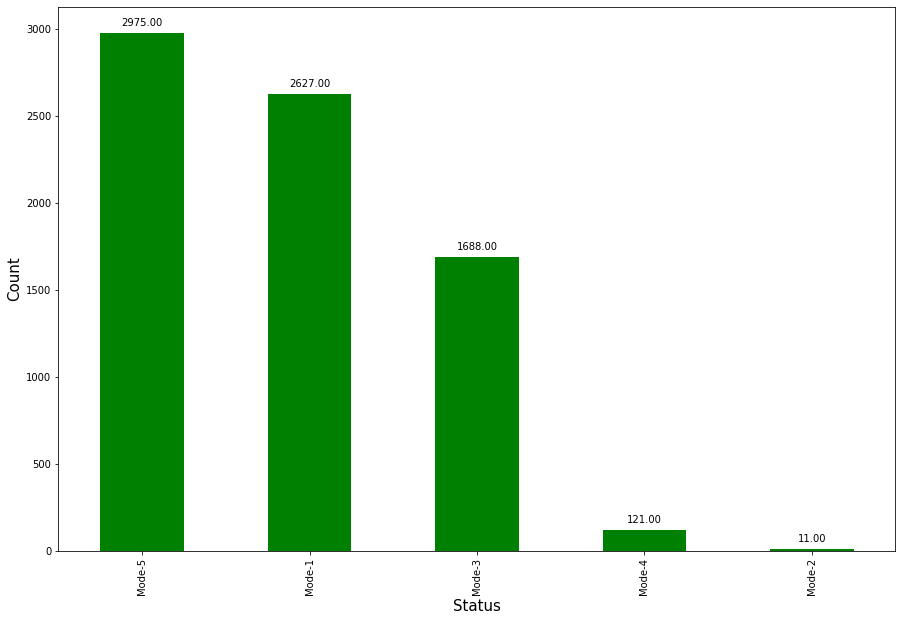

In [28]:
plt.figure(figsize=(15,10))
Status=data.Status.value_counts()
plt.xlabel('Status',fontsize=15)
plt.ylabel('Count',fontsize=15)
splot=Delivery_Mode.plot(kind='bar',color='green')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),  textcoords = 'offset points')

Junk lead has most entries in Status and only few leads have been converted 

# Cleaning the data

In [29]:
data=data.drop(columns=['Mobile','EMAIL','Created'])

In [30]:
data.shape

(7422, 6)

In [31]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Open
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Open


In [32]:
data.replace('',np.nan,inplace=True)
data.dropna(axis=0,inplace=True)
data.reset_index(inplace=True,drop=True)

In [33]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


In [34]:
data.isna().sum().to_frame().T

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,0,0,0,0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
Product_ID       7328 non-null float64
Source           7328 non-null object
Sales_Agent      7328 non-null object
Location         7328 non-null object
Delivery_Mode    7328 non-null object
Status           7328 non-null object
dtypes: float64(1), object(5)
memory usage: 343.6+ KB


In [36]:
pd.get_dummies(data.Status,drop_first=True)

,In Progress Negative,In Progress Positive,Junk Lead,Just Enquiry,LOST,Long Term,Not Responding,Open,Potential,converted
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7323,0,0,0,0,1,0,0,0,0,0
7324,0,0,0,0,1,0,0,0,0,0
7325,0,0,0,0,0,0,1,0,0,0
7326,0,0,0,1,0,0,0,0,0,0


# Convert the Status field values into High Potential and Low Potential

In [37]:
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High Potential',inplace=True)
data.Status.replace(['Lost','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low Potential',inplace=True)

In [38]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,High Potential
1,19.0,Call,Sales-Agent-4,Other Locations,Mode-5,High Potential
2,18.0,Website,Sales-Agent-11,Trivandrum,Mode-1,High Potential
3,15.0,Website,Sales-Agent-7,Hyderabad,Mode-1,Low Potential
4,18.0,Call,Sales-Agent-7,Bangalore,Mode-1,High Potential


In [39]:
pd.get_dummies(data.Delivery_Mode,drop_first=True)

,Mode-2,Mode-3,Mode-4,Mode-5
0,0,0,0,0
1,0,0,0,1
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
7323,0,0,1,0
7324,0,0,0,1
7325,0,0,0,0
7326,0,0,0,0


In [40]:
pd.get_dummies(data.Location,drop_first=True)

,Bangalore,Chennai,Delhi,EUROPE,Howrah,Hyderabad,Kolkata,Malaysia,Mumbai,Other Locations,Pune,Singapore,Trivandrum,UAE,UK,USA
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7324,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7325,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7326,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [41]:
pd.get_dummies(data.Sales_Agent,drop_first=True)

,Sales-Agent-11,Sales-Agent-12,Sales-Agent-2,Sales-Agent-3,Sales-Agent-4,Sales-Agent-5,Sales-Agent-6,Sales-Agent-7,Sales-Agent-8,Sales-Agent-9
0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7323,0,0,0,0,0,0,1,0,0,0
7324,0,1,0,0,0,0,0,0,0,0
7325,1,0,0,0,0,0,0,0,0,0
7326,0,0,0,0,1,0,0,0,0,0


In [42]:
pd.get_dummies(data.Source,drop_first=True)

,CRM form,Call,Campaign,Customer Referral,E-Mail Message,E-mail Campaign,Existing Client,Existing Customer,Just Dial,Live Chat -PPC,...,Live Chat-Google Ads,Live Chat-Google Organic,Live Chat-Justdial,Live Chat-Quora,Live Chat-Youtube,Other,Personal Contact,SMS Campaign,US Website,Website
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7323,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7324,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7326,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Using Counter to count the key value pairs inside the dictionary for each feature

In [43]:
Counter(data.Location)

Counter({'Bangalore': 2079,
         'Other Locations': 2481,
         'Trivandrum': 58,
         'Hyderabad': 527,
         'Chennai': 907,
         'UK': 41,
         'USA': 45,
         'Delhi': 470,
         'UAE': 77,
         'Mumbai': 399,
         'Kolkata': 55,
         'Singapore': 17,
         'Pune': 139,
         'AUSTRALIA': 25,
         'EUROPE': 3,
         'Malaysia': 4,
         'Howrah': 1})

In [44]:
Counter(data.Source)

Counter({'Live Chat-Google Organic': 269,
         'Call': 2536,
         'Website': 1551,
         'Live Chat-Direct': 1827,
         'By Recommendation': 32,
         'Customer Referral': 180,
         'Live Chat-Blog': 237,
         'Live Chat -PPC': 249,
         'Live Chat-Google Ads': 20,
         'Live Chat-Adwords Remarketing': 7,
         'E-Mail Message': 1,
         'Existing Client': 51,
         'Live Chat-CPC': 49,
         'Existing Customer': 22,
         'Live Chat-Quora': 2,
         'US Website': 129,
         'Just Dial': 56,
         'Campaign': 19,
         'Other': 2,
         'E-mail Campaign': 12,
         'CRM form': 22,
         'SMS Campaign': 2,
         'Personal Contact': 50,
         'Live Chat-Youtube': 2,
         'Live Chat-Justdial': 1})

In [45]:
Counter(data.Sales_Agent)

Counter({'Sales-Agent-3': 780,
         'Sales-Agent-4': 1495,
         'Sales-Agent-11': 1414,
         'Sales-Agent-7': 734,
         'Sales-Agent-9': 878,
         'Sales-Agent-8': 68,
         'Sales-Agent-5': 1182,
         'Sales-Agent-2': 389,
         'Sales-Agent-12': 269,
         'Sales-Agent-10': 5,
         'Sales-Agent-6': 114})

In [46]:
Counter(data.Status)

Counter({'High Potential': 2862, 'Low Potential': 4027, 'LOST': 439})

In [47]:
Counter(data.Product_ID)

Counter({9.0: 990,
         19.0: 1188,
         18.0: 1706,
         15.0: 1501,
         27.0: 737,
         5.0: 484,
         2.0: 38,
         3.0: 7,
         25.0: 90,
         10.0: 168,
         20.0: 101,
         11.0: 12,
         21.0: 65,
         1.0: 104,
         12.0: 36,
         13.0: 4,
         24.0: 2,
         26.0: 31,
         16.0: 3,
         23.0: 2,
         22.0: 8,
         8.0: 6,
         14.0: 27,
         6.0: 7,
         17.0: 6,
         0.0: 2,
         28.0: 1,
         7.0: 1,
         4.0: 1})

In [48]:
Counter(data.Delivery_Mode)

Counter({'Mode-1': 2614,
         'Mode-5': 2903,
         'Mode-3': 1681,
         'Mode-2': 10,
         'Mode-4': 120})

# Using Label Encoder

# Import the necessary package

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
enc=LabelEncoder()
data.Source=enc.fit_transform(data.Source)
data.Sales_Agent=enc.fit_transform(data.Sales_Agent)
data.Location=enc.fit_transform(data.Location)
data.Delivery_Mode=enc.fit_transform(data.Delivery_Mode)
data.Status=enc.fit_transform(data.Status)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
Product_ID       7328 non-null float64
Source           7328 non-null int32
Sales_Agent      7328 non-null int32
Location         7328 non-null int32
Delivery_Mode    7328 non-null int32
Status           7328 non-null int32
dtypes: float64(1), int32(5)
memory usage: 200.5 KB


# Checking for Outliers

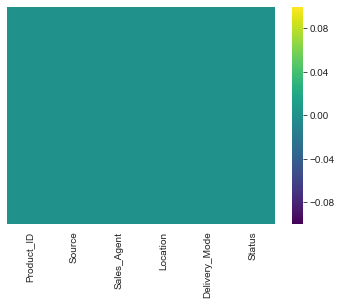

In [52]:
sns.set_style('whitegrid')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [53]:
corr=data.corr()
corr

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.060910,0.006529,-0.041227,-0.036025,-0.080433
Source,0.060910,1.000000,-0.019623,0.054901,-0.151242,0.041742
Sales_Agent,0.006529,-0.019623,1.000000,-0.129056,-0.224688,-0.132501
Location,-0.041227,0.054901,-0.129056,1.000000,0.397186,0.324718
Delivery_Mode,-0.036025,-0.151242,-0.224688,0.397186,1.000000,0.237633
Status,-0.080433,0.041742,-0.132501,0.324718,0.237633,1.000000


# Correlation Matrix

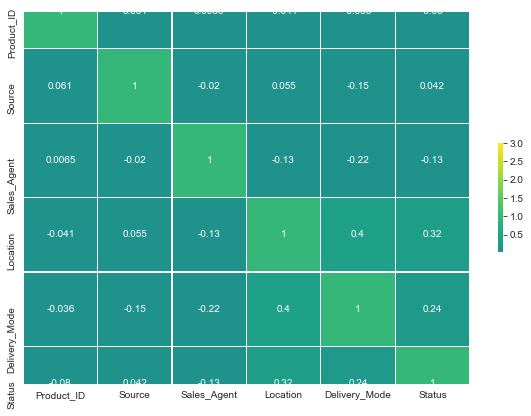

In [54]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap='viridis', vmax=3, vmin=0.03, center=0,square=True, linewidths=0.2, cbar_kws={"shrink":0.2}, annot=True)

In [55]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,9.0,16,4,1,0,0
1,19.0,2,5,10,4,0
2,18.0,24,1,13,0,0
3,15.0,24,8,6,0,2
4,18.0,2,8,1,0,0


In [56]:
data.isna().sum().to_frame().T

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,0,0,0,0,0,0


In [57]:
Product_ID_correlation=data.corr()['Product_ID'].sort_values()
Product_ID_correlation

Status          -0.080433
Location        -0.041227
Delivery_Mode   -0.036025
Sales_Agent      0.006529
Source           0.060910
Product_ID       1.000000
Name: Product_ID, dtype: float64

In [58]:
data.corr()['Sales_Agent'].sort_values()

Delivery_Mode   -0.224688
Status          -0.132501
Location        -0.129056
Source          -0.019623
Product_ID       0.006529
Sales_Agent      1.000000
Name: Sales_Agent, dtype: float64

In [59]:
data.corr()['Delivery_Mode'].sort_values

<bound method Series.sort_values of Product_ID      -0.036025
Source          -0.151242
Sales_Agent     -0.224688
Location         0.397186
Delivery_Mode    1.000000
Status           0.237633
Name: Delivery_Mode, dtype: float64>

In [60]:
data.corr()['Source'].sort_values()

Delivery_Mode   -0.151242
Sales_Agent     -0.019623
Status           0.041742
Location         0.054901
Product_ID       0.060910
Source           1.000000
Name: Source, dtype: float64

In [61]:
data.corr()['Location'].sort_values()

Sales_Agent     -0.129056
Product_ID      -0.041227
Source           0.054901
Status           0.324718
Delivery_Mode    0.397186
Location         1.000000
Name: Location, dtype: float64

# Machine Learning model to predict the Lead Category(High Potential, Low Potential)

# Define X and Y Variables

In [62]:
X=data[['Product_ID','Source','Sales_Agent','Location','Delivery_Mode']]
y=data.Status

In [63]:
X.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode
0,9.0,16,4,1,0
1,19.0,2,5,10,4
2,18.0,24,1,13,0
3,15.0,24,8,6,0
4,18.0,2,8,1,0


In [64]:
y.head()

0    0
1    0
2    0
3    2
4    0
Name: Status, dtype: int32

# Use train-test split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

In [66]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape ",y_test.shape)

X_train shape =  (5496, 5)
X_test shape =  (1832, 5)
y_train shape = (5496,)
y_test shape  (1832,)


# Using Standard Scaler

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [69]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape ",y_test.shape)

X_train shape =  (5496, 5)
X_test shape =  (1832, 5)
y_train shape = (5496,)
y_test shape  (1832,)


# Using SMOTE technique

In [70]:
#  ! pip install imblearn

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
smote=SMOTE()
X_train, y_train = smote.fit_sample(X_train,y_train)


In [73]:
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape ",y_test.shape)

X_train shape =  (8991, 5)
X_test shape =  (1832, 5)
y_train shape = (8991,)
y_test shape  (1832,)


# Using PCA technique

# Import thenecessary package

In [74]:
from sklearn.decomposition import PCA

# Define the model

In [75]:
pca=PCA(svd_solver='auto',random_state=10)
X=pd.DataFrame(pca.fit_transform(X))
X.head()

,0,1,2,3,4
0,3.742911,6.935790,-5.467673,-1.643644,1.228632
1,-9.157046,-3.515229,4.998300,0.540038,-0.786862
2,12.903747,-0.469192,6.940380,-2.434308,3.387419
3,12.359758,1.957042,-1.111424,3.150533,1.197565
4,-9.442157,-3.226381,-4.998045,2.313376,1.153146


In [76]:
pca.explained_variance_ratio_

array([0.52549458, 0.26459349, 0.13698127, 0.05666528, 0.01626539])

In [77]:
pca.explained_variance_

array([72.94237527, 36.72745392, 19.01397138,  7.86554237,  2.25775114])

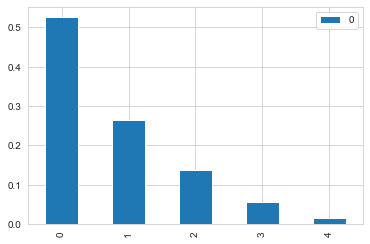

In [78]:
sales_var=pd.DataFrame(pca.explained_variance_ratio_)
sales_var.plot(kind='bar')

# Train and Predict the Model

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=10)

model=RandomForestClassifier(random_state=10,n_estimators=100,max_depth=20,criterion='gini')
model.fit(X_train,y_train)

y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[433  16 284]
 [ 44   9  58]
 [252  22 714]]


col_0,0,1,2
Status,,,
0,433,16,284
1,44,9,58
2,252,22,714


# Finding the Accuracy,Precision,recalland F1 score 

In [80]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy of Training =  83.87918486171762
Accuracy of Testing =  63.1004366812227
Precision score =  61.38940522710064
Recall score =  63.1004366812227
F1 score =  62.06751219897876


# Generate the classification report

In [81]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       733
           1       0.19      0.08      0.11       111
           2       0.68      0.72      0.70       988

    accuracy                           0.63      1832
   macro avg       0.49      0.46      0.47      1832
weighted avg       0.61      0.63      0.62      1832



# Plotting ROC Curve

In [82]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [83]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
rf_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

In [84]:
# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, y_predict)

ValueError: multi_class must be in ('ovo', 'ovr')

In [85]:
# Sumarize the scores
print('No Skill: ROC-AUC=%.3f' % (ns_auc))
print('Random Forest:ROC-AUC=%.3f' %(rf_auc))


NameError: name 'ns_auc' is not defined

# 1. using Random Forest Classifier

# 1.1) Using GridSearchCV

# Import the necessary Packages

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report,f1_score,recall_score

# Using train-test split

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5, random_state=5)

# Define and train the model

In [88]:
model=RandomForestClassifier(n_estimators=10,random_state=5)
parameters={'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3],
            'n_estimators':[10,20],'random_state' :[5]}
grid=GridSearchCV(model,parameters,scoring='accuracy',cv=15)
grid.fit(X_train,y_train)

GridSearchCV(cv=15,
             estimator=RandomForestClassifier(n_estimators=10, random_state=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [10, 20], 'random_state': [5]},
             scoring='accuracy')

In [89]:
grid.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 10,
 'random_state': 5}

In [90]:
grid.best_score_

0.64491468718635

# Predict the model

In [91]:
y_train_predict=grid.predict(X_train)
y_predict=grid.predict(X_test)

# Generating the Crosstab and confussion matrix

In [92]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 840   17  562]
 [  76    8  141]
 [ 518   15 1487]]


col_0,0,1,2
Status,,,
0,840,17,562
1,76,8,141
2,518,15,1487


# Finding the Accuracy,Precision,recall and F1 score

In [93]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_predict)*100)

Accuracy of Training =  81.27729257641921
Accuracy of Testing =  63.728165938864635


In [94]:
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Precision score =  61.34782110745214
Recall score =  63.728165938864635
F1 score =  62.12127104895083


# Generate the classification report

In [95]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1419
           1       0.20      0.04      0.06       225
           2       0.68      0.74      0.71      2020

    accuracy                           0.64      3664
   macro avg       0.49      0.45      0.45      3664
weighted avg       0.61      0.64      0.62      3664



# 1.2) Using RandomizedSearchCV

# Define and train the model

In [96]:
model=RandomForestClassifier(n_estimators=10, random_state=5)
parameters={'min_samples_split': [2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3],
           'n_estimators':[10,20],'random_state' : [5]}
randomized=RandomizedSearchCV(model,parameters,scoring='accuracy',cv=15)
randomized.fit(X_train,y_train)

RandomizedSearchCV(cv=15,
                   estimator=RandomForestClassifier(n_estimators=10,
                                                    random_state=5),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [10, 20],
                                        'random_state': [5]},
                   scoring='accuracy')

In [97]:
randomized.best_params_

{'random_state': 5,
 'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'criterion': 'gini'}

In [98]:
randomized.best_score_

0.6446526151444184

# Predict the model

In [99]:
y_train_predict=randomized.predict(X_train)
y_predict=randomized.predict(X_test)

# Generating Confusion matrix and crosstab

In [100]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[ 827   11  581]
 [  72    7  146]
 [ 484   13 1523]]


col_0,0,1,2
Status,,,
0,827,11,581
1,72,7,146
2,484,13,1523


# Logistic Regtression

In [101]:
from sklearn.linear_model import LogisticRegression

# Using train_test_split

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=5)

# Define and train the Model

In [103]:
model=LogisticRegression(random_state=5,C=2.0,multi_class='ovr')
model.fit(X_train,y_train)

LogisticRegression(C=2.0, multi_class='ovr', random_state=5)

# Predict the Model

In [104]:
y_train_predict=model.predict(X_train)
y_predict=model.predict(X_test)

# Generating the confusion matrix and crosstab

In [105]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict)

[[391   0 301]
 [ 38   0  72]
 [232   0 798]]


col_0,0,2
Status,,
0,391,301
1,38,72
2,232,798


# Finding Accuracy, Precision, Recall and F-1 score

In [106]:
print("Accuracy of Training = " ,accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy of Training =  63.045851528384276
Accuracy of Testing =  64.90174672489083
Precision score =  60.65776542502086
Recall score =  64.90174672489083
F1 score =  62.600289410428914


# Generating the classification report

In [107]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       692
           1       0.00      0.00      0.00       110
           2       0.68      0.77      0.73      1030

    accuracy                           0.65      1832
   macro avg       0.42      0.45      0.43      1832
weighted avg       0.61      0.65      0.63      1832

